# Using Support Vector Machine as Regression
## Step 1. Load the dataset

In [1]:
#dataset : Medical Cost Personal Datasets (https://www.kaggle.com/mirichoi0218/insurance/data)
import pandas as pd
insurance = pd.read_csv('./insurance/insurance.csv')
X=insurance.drop(['sex','smoker','region','charges','children','bmi'],axis=1).values
y=insurance.charges.values
X

array([[19],
       [18],
       [28],
       ..., 
       [18],
       [21],
       [61]], dtype=int64)

In [2]:
#Do preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
X_prepared = num_pipeline.fit_transform(X) #정제된 X

In [3]:
#training set & test set 나누기
from sklearn.model_selection import train_test_split
import numpy as np
X_train , X_test , y_train , y_test = train_test_split(X_prepared,y,test_size=0.2,random_state=42)

## Step 2. Train linearSVR and SVR using the dataset.

In [4]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#LinearSVR
lin_svr = LinearSVR(epsilon=1.5,random_state=42)
#SVR
svm_poly_reg = SVR(kernel='poly',degree=3 ,coef0=1, C=5)
svm_rbf_reg = SVR(kernel='rbf',gamma=5, C=0.001)

In [5]:
#LinearSVR
lin_svr.fit(X_train,y_train)
#SVR
svm_poly_reg.fit(X_train,y_train)
svm_rbf_reg.fit(X_train,y_train)

SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Step 3. Find dataset's shape and compare accuracy

- 아래는 그래프를 그리기 위함

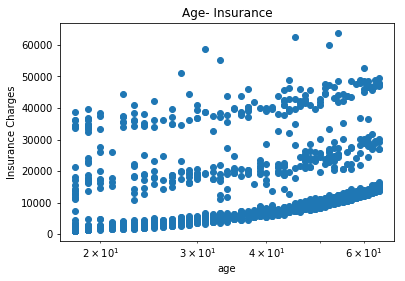

In [6]:
#그래프를 그리기위한 준비
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Age - Insurance charges graph
plt.scatter(X[:,0],y)
plt.xscale('log') 
# Strings
xlab = 'age'
ylab = 'Insurance Charges'
title = 'Age- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

In [7]:
# BMI - Insurance charges Graph
plt.scatter(X[:,1],y)
plt.xscale('log') 
# Strings
xlab = 'bmi'
ylab = 'Insurance Charges'
title = 'bmi- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [8]:
# Num of child - Insurance charges Graph
plt.scatter(X[:,2],y)
plt.xscale('log') 
# Strings
xlab = 'num of child'
ylab = 'Insurance Charges'
title = 'num of child- Insurance'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 1

In [9]:
#Find Coefficience and intercept values.
print('LinearSVR 의 coef & intercept')
print('coef : {}'.format(lin_svr.coef_))
print('intercept : {}'.format(lin_svr.intercept_))

LinearSVR 의 coef & intercept
coef : [ 11.4265671]
intercept : [ 1070.]


In [10]:
print("SVR('poly') 의 intercept")
print('intercept : {}'.format(svm_poly_reg.intercept_))

SVR('poly') 의 intercept
intercept : [ 7243.411891]


In [11]:
print("SVR('rbf') 의 intercept")
print('intercept : {}'.format(svm_rbf_reg.intercept_))

SVR('rbf') 의 intercept
intercept : [ 9575.38774141]


In [12]:
#case1 : Compare prediction results using same data.
some_data = X_test[13] #예제 data
some_labels = y_test[13] #실제 label : 46151.1245
some_data , some_labels

(array([ 0.48366788]), 46151.124499999998)

In [13]:
# 예제 데이터의 predict 값을 출력하는 함수
def gotPredict(data):
    print('Prediction of some_data')
    print('LinearSVR : {}'.format(lin_svr.predict(data)))
    print('poly Kernel SVR : {}'.format(svm_poly_reg.predict(data)))
    print('rbf Kernel SVR : {}'.format(svm_rbf_reg.predict(data)))
gotPredict([some_data])

Prediction of some_data
LinearSVR : [ 1075.52666344]
poly Kernel SVR : [ 8461.65615694]
rbf Kernel SVR : [ 9575.36875611]


In [14]:
#compare RMSE (cross_val)
from sklearn.model_selection import cross_val_score
lin_mse = cross_val_score(lin_svr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse = np.sqrt(-lin_mse)
poly_mse = cross_val_score(svm_poly_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
poly_rmse = np.sqrt(-poly_mse)
rbf_mse = cross_val_score(svm_rbf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rbf_rmse = np.sqrt(-rbf_mse)

In [15]:
#print RMSE
print('RMSE 비교')
print('LinearSVR : {}'.format(lin_rmse.mean()))
print('poly Kernel SVR : {}'.format(poly_rmse.mean()))
print('rbf Kernel SVR : {}'.format(rbf_rmse.mean()))

RMSE 비교
LinearSVR : 17219.779428086935
poly Kernel SVR : 12892.994322584187
rbf Kernel SVR : 12562.196516938158


- SVR('rbf') is best model

## Step 4. Find the best hyperparameters in the picked model.

In [16]:
#grid search
from sklearn.model_selection import GridSearchCV
rbf_kernel = SVR(kernel='rbf')
param_grid = [
    {'gamma': [1,5,10], 'C': [0.01,0.1,1,10,100,200]}
  ]
grid = GridSearchCV(rbf_kernel,param_grid,cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [1, 5, 10], 'C': [0.01, 0.1, 1, 10, 100, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
print('##########################################################')
print('Best hyperparameter: {}'.format(grid.best_params_))

12601.0083721 {'C': 0.01, 'gamma': 1}
12600.9941534 {'C': 0.01, 'gamma': 5}
12600.9862243 {'C': 0.01, 'gamma': 10}
12600.9813335 {'C': 0.1, 'gamma': 1}
12600.7800035 {'C': 0.1, 'gamma': 5}
12600.7592028 {'C': 0.1, 'gamma': 10}
12597.3885241 {'C': 1, 'gamma': 1}
12594.6331702 {'C': 1, 'gamma': 5}
12595.3334072 {'C': 1, 'gamma': 10}
12677.2306996 {'C': 10, 'gamma': 1}
12625.4463467 {'C': 10, 'gamma': 5}
12608.5276456 {'C': 10, 'gamma': 10}
12946.2117565 {'C': 100, 'gamma': 1}
12944.0563806 {'C': 100, 'gamma': 5}
12917.5458549 {'C': 100, 'gamma': 10}
12990.6710245 {'C': 200, 'gamma': 1}
12980.8621633 {'C': 200, 'gamma': 5}
12971.9598162 {'C': 200, 'gamma': 10}
##########################################################
Best hyperparameter: {'C': 1, 'gamma': 5}


In [23]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "r-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "r--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "r--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

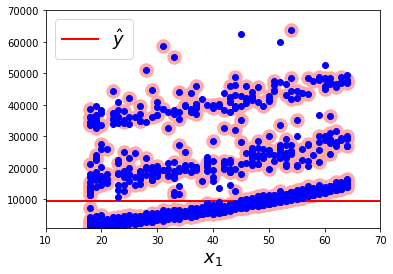

In [24]:
plot_svm_regression(svm_rbf_reg,X[:,0], y, [10,70,1000,70000])

plt.show()

- best hyperparameter of SVR (kernel='rbf') is C:10 , gamma:1

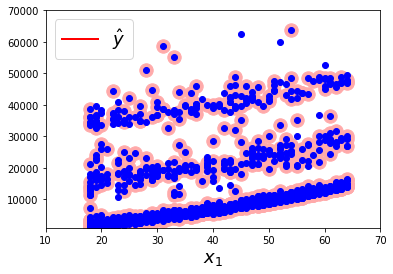

In [25]:
plot_svm_regression(svm_poly_reg,X[:,0], y, [10,70,1000,70000])

plt.show()

AttributeError: 'LinearSVR' object has no attribute 'support_'

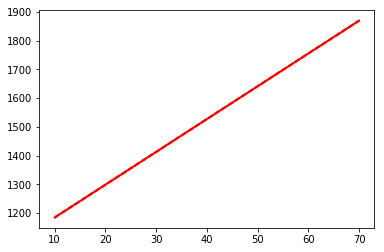

In [26]:
plot_svm_regression(lin_svr,X[:,0], y, [10,70,1000,70000])

plt.show()